In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/data01/Tomo2Mesh/scratchpad/polymer_am_eaton/code')
from rw_utils import read_raw_data_1X, save_path
from recon import recon_slice
from tomo2mesh.fbp.recon import recon_all
from tomo2mesh.misc.voxel_processing import cylindrical_mask
from tomo2mesh.misc import viewer
import pandas as pd

In [9]:
sample_num = '45'
layer = 12
projs, theta, center_guess, dark, flat = read_raw_data_1X(str(sample_num), layer)

In [10]:
center_guess = 1225 #1225
search_width = 25 #200
search_res = 1
num = int(search_width/search_res + 1)

In [11]:
centers = np.linspace(-search_width//2+center_guess,search_width//2+center_guess,num, endpoint = True)

In [12]:
images = []
for ii, center in enumerate(centers):
    image = recon_slice(projs, theta, center, dark, flat, 0.5, 3.13)[np.newaxis,...]
    cylindrical_mask(image, 1.0, mask_val = image.min())
    image = image[0]
    images.append(image)
    print(r'%i of %i'%(ii, len(centers)), end = ";")

data shape: (ntheta, nz, n) (1500, 21, 2448)
0 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
1 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
2 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
3 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
4 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
5 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
6 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
7 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
8 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
9 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
10 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
11 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
12 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
13 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
14 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
15 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
16 of 26;data shape: (ntheta, nz, n) (1500, 21, 2448)
17 of 26;data shape: (ntheta, nz, n) (1500, 21,

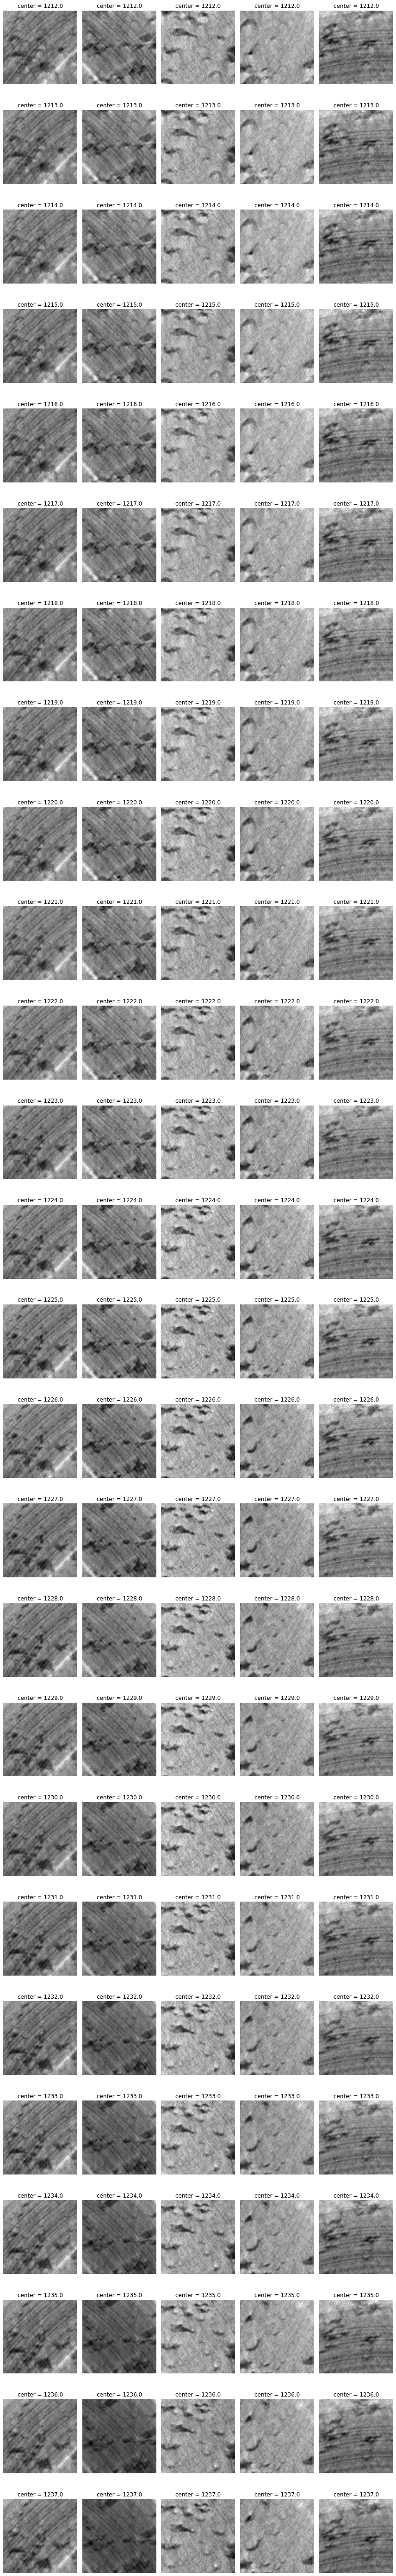

In [13]:
s = []
s.append((slice(500,750), slice(500,750)))
s.append((slice(500,750), slice(1750,2000)))      
s.append((slice(1500,1750), slice(500,750)))
s.append((slice(1500,1750), slice(1750,2000)))
s.append((slice(200,450), slice(1000,1250)))
fig, ax = plt.subplots(len(images),5, figsize = (12,len(images)/4.0*12))
for ii in range(len(images)):
    for i4 in range(5):
        ax[ii,i4].imshow(images[ii][s[i4]], cmap = 'gray')
        ax[ii,i4].set_title(f"center = {centers[ii]}")
        ax[ii,i4].axis('off')
fig.tight_layout()

## Write Center to CSV File

In [14]:
# correct_center = center_guess
correct_center = 1227
image = images[np.argmin(np.abs(centers-correct_center))]

<AxesSubplot:>

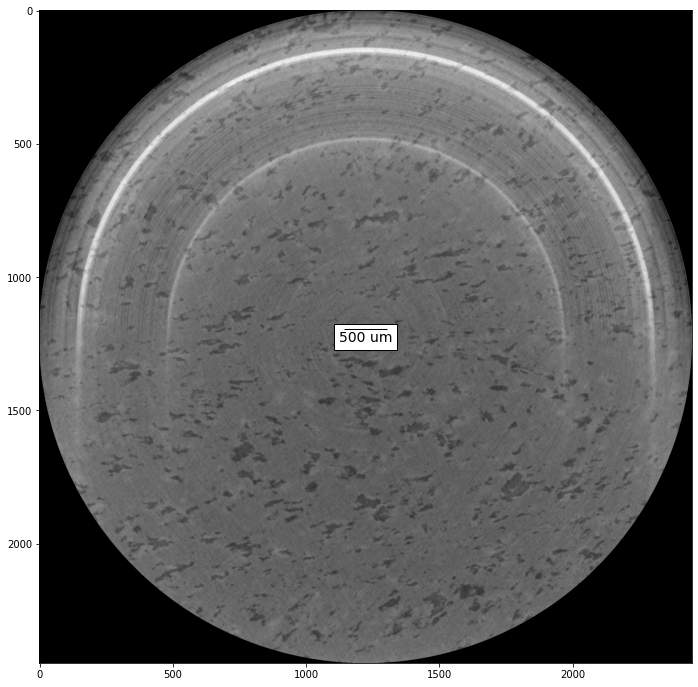

In [15]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.imshow(image, cmap = 'gray')
viewer.add_scalebar(ax, 500, 3.13, fontsize = 14, loc = 'center')
# ax.axis('off')

In [16]:
df = pd.read_csv(save_path)
df.loc[(df["sample_num"] == sample_num) & (df["layer"] == layer),"rot_cen"] = correct_center
df.to_csv(save_path,index = False)